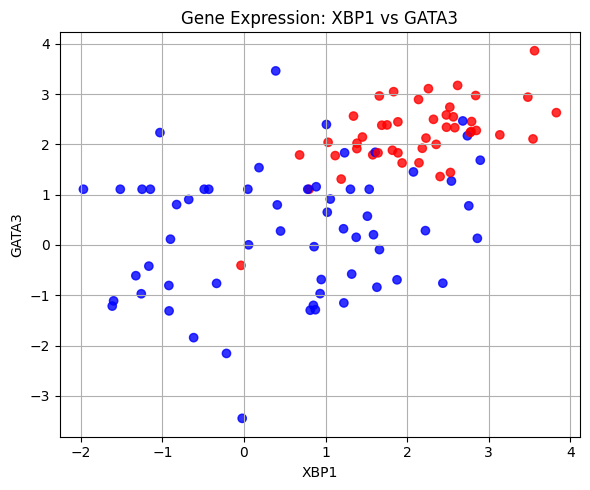

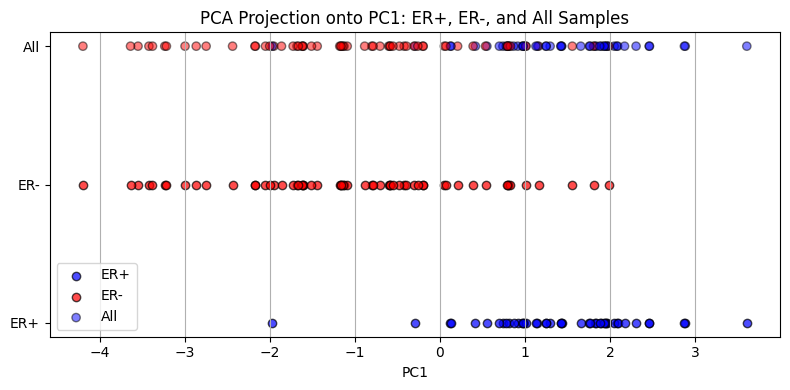

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import gzip
#First, we need to install the required libraries:
#the required libraries have been installed in the environment

class_labels = pd.read_csv("class.tsv", header=None, names=["Class"])["Class"]
columns_df = pd.read_csv("columns.tsv.gz", sep="\t", comment="#")
gene_ids = columns_df.set_index("GeneSymbol").loc[["XBP1", "GATA3"]]["ID"].astype(str).tolist()

# Reading the expression data
with gzip.open("filtered.tsv.gz", "rt") as f:
    expression_df = pd.read_csv(f, sep="\t")
    
# The first row is the header, and the first column is the index

expression_df.columns = expression_df.columns.str.strip()

selected_expression = expression_df[gene_ids].copy()
selected_expression.columns = ["XBP1", "GATA3"]

# We need to convert the class labels to numeric values

plt.figure(figsize=(6, 5))
colors = class_labels.map({1: "red", 0: "blue"})
plt.scatter(selected_expression["XBP1"], selected_expression["GATA3"], c=colors, alpha=0.8)
plt.xlabel("XBP1")
plt.ylabel("GATA3")
plt.title("Gene Expression: XBP1 vs GATA3")
plt.grid(True)
plt.tight_layout()
plt.show()

# Performing PCA on the selected expression data

pca = PCA(n_components=1)
pc1 = pca.fit_transform(selected_expression)

pca = PCA(n_components=1)
pc1 = pca.fit_transform(selected_expression).flatten()

plt.figure(figsize=(8, 4))
colors = class_labels.map({0: "red", 1: "blue"})

plt.scatter(pc1[class_labels == 1], np.zeros_like(pc1[class_labels == 1]),
            c="blue", label="ER+", alpha=0.7, edgecolor='k')

plt.scatter(pc1[class_labels == 0], np.ones_like(pc1[class_labels == 0]),
            c="red", label="ER-", alpha=0.7, edgecolor='k')

plt.scatter(pc1, np.full_like(pc1, 2), c=colors, label="All", alpha=0.5, edgecolor='k')

plt.yticks([0, 1, 2], ["ER+", "ER-", "All"])
plt.xlabel("PC1")
plt.title("PCA Projection onto PC1: ER+, ER-, and All Samples")
plt.grid(True, axis='x')
plt.legend()
plt.tight_layout()
plt.show()

